<a href="https://colab.research.google.com/github/trieyed/AI/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BODY-FAT DATASET

###**Objective**:
---
<br> To perform EDA and fit a classification model that predicts category of a person (Muscular, Obese, Fat, Slightly Fat, Average or Lean) based on various other features.

---

### **1. MODULES IMPORT AND DATA LOAD**

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/body_fat_new.csv")

## **2. EXPLORATORY DATA ANALYSIS**

###**2.1 Data Profiling**

In [ ]:
# Viewing the dataset's first 5 rows
df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Category
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Lean
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Lean
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Fat
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,Lean
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Fat


---
**Feature description:**
1. Density determined from underwater weighing
2. Age (years)
3. Weight (lbs)
4. Height (inches)
5. Neck circumference (cm)
6. Chest circumference (cm)
7. Abdomen 2 circumference (cm)
8. Hip circumference (cm)
9. Thigh circumference (cm)
10. Knee circumference (cm)
11. Ankle circumference (cm)
12. Biceps (extended) circumference (cm)
13. Forearm circumference (cm)
14. Wrist circumference (cm)
15. Category

---

In [ ]:
# Display dataset summary
print("\n Dataset Summary:\n")
print(df.info())


 Dataset Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Density   252 non-null    float64
 1   Age       252 non-null    int64  
 2   Weight    252 non-null    float64
 3   Height    252 non-null    float64
 4   Neck      252 non-null    float64
 5   Chest     252 non-null    float64
 6   Abdomen   252 non-null    float64
 7   Hip       252 non-null    float64
 8   Thigh     252 non-null    float64
 9   Knee      252 non-null    float64
 10  Ankle     252 non-null    float64
 11  Biceps    252 non-null    float64
 12  Forearm   252 non-null    float64
 13  Wrist     252 non-null    float64
 14  Category  252 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 29.7+ KB
None


---
Here are the info we received:
1. 15 columns
2. 252 rows
3. No null values
4. All data are numerical except for one column-"Category", which contains data of objective type

---

In [ ]:
#Basic stats overview on the data
print("\n Stats Overview:")
df.describe()


 Stats Overview:


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### **2.2 Data Quality Checks**

#### **Checking Missing Values**

In [ ]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Density     0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
Category    0
dtype: int64


---

*   No missing values found. Data is clean.

---

#### **Checking for Duplicates**

In [ ]:
# Check for duplicated values
print("\n Duplicated Values:")
df.duplicated().sum()


 Duplicated Values:


np.int64(0)

---

*   No duplicate values found either. Good Quality data.

---

###**2.3 Visualization**

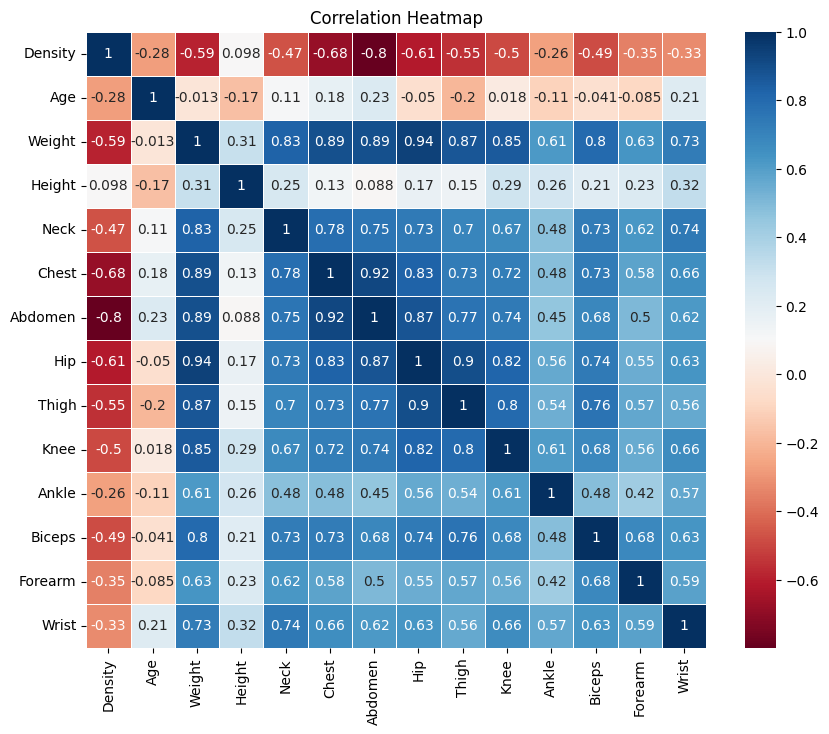

In [ ]:
#find correlation matrix
correlation_matrix = df.corr(numeric_only = True)

#visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap="RdBu", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

---
The columns : **Neck, Chest, Abdomen, Hip, Thigh, Knee and Biceps** are seen to be highly correlated with each other marking that the growth of all these organs happens together.

---

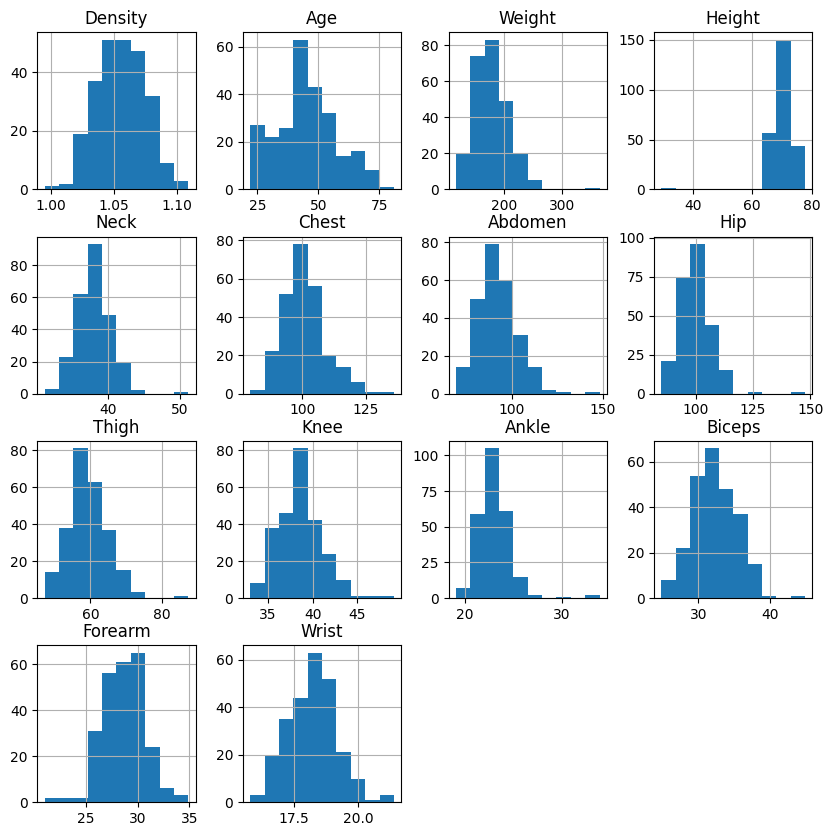

In [ ]:
#Hist plot for all numerical datas
df.hist(figsize=(10,10))
plt.show()

Text(0, 0.5, 'Count')

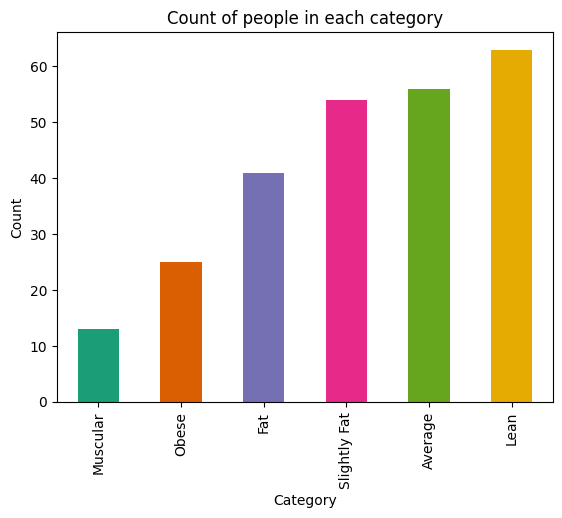

In [ ]:
#Grouping the number of people in each category among 252 people
df.groupby('Category').size().sort_values(ascending=True).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Count of people in each category') # Added a title for clarity
plt.xlabel('Category') # Added xlabel
plt.ylabel('Count') # Added ylabel

We can see that most of the people belong to "Lean", "Average" and "Slightly Fat" categories while the least amount of people belong to "Muscular" category.

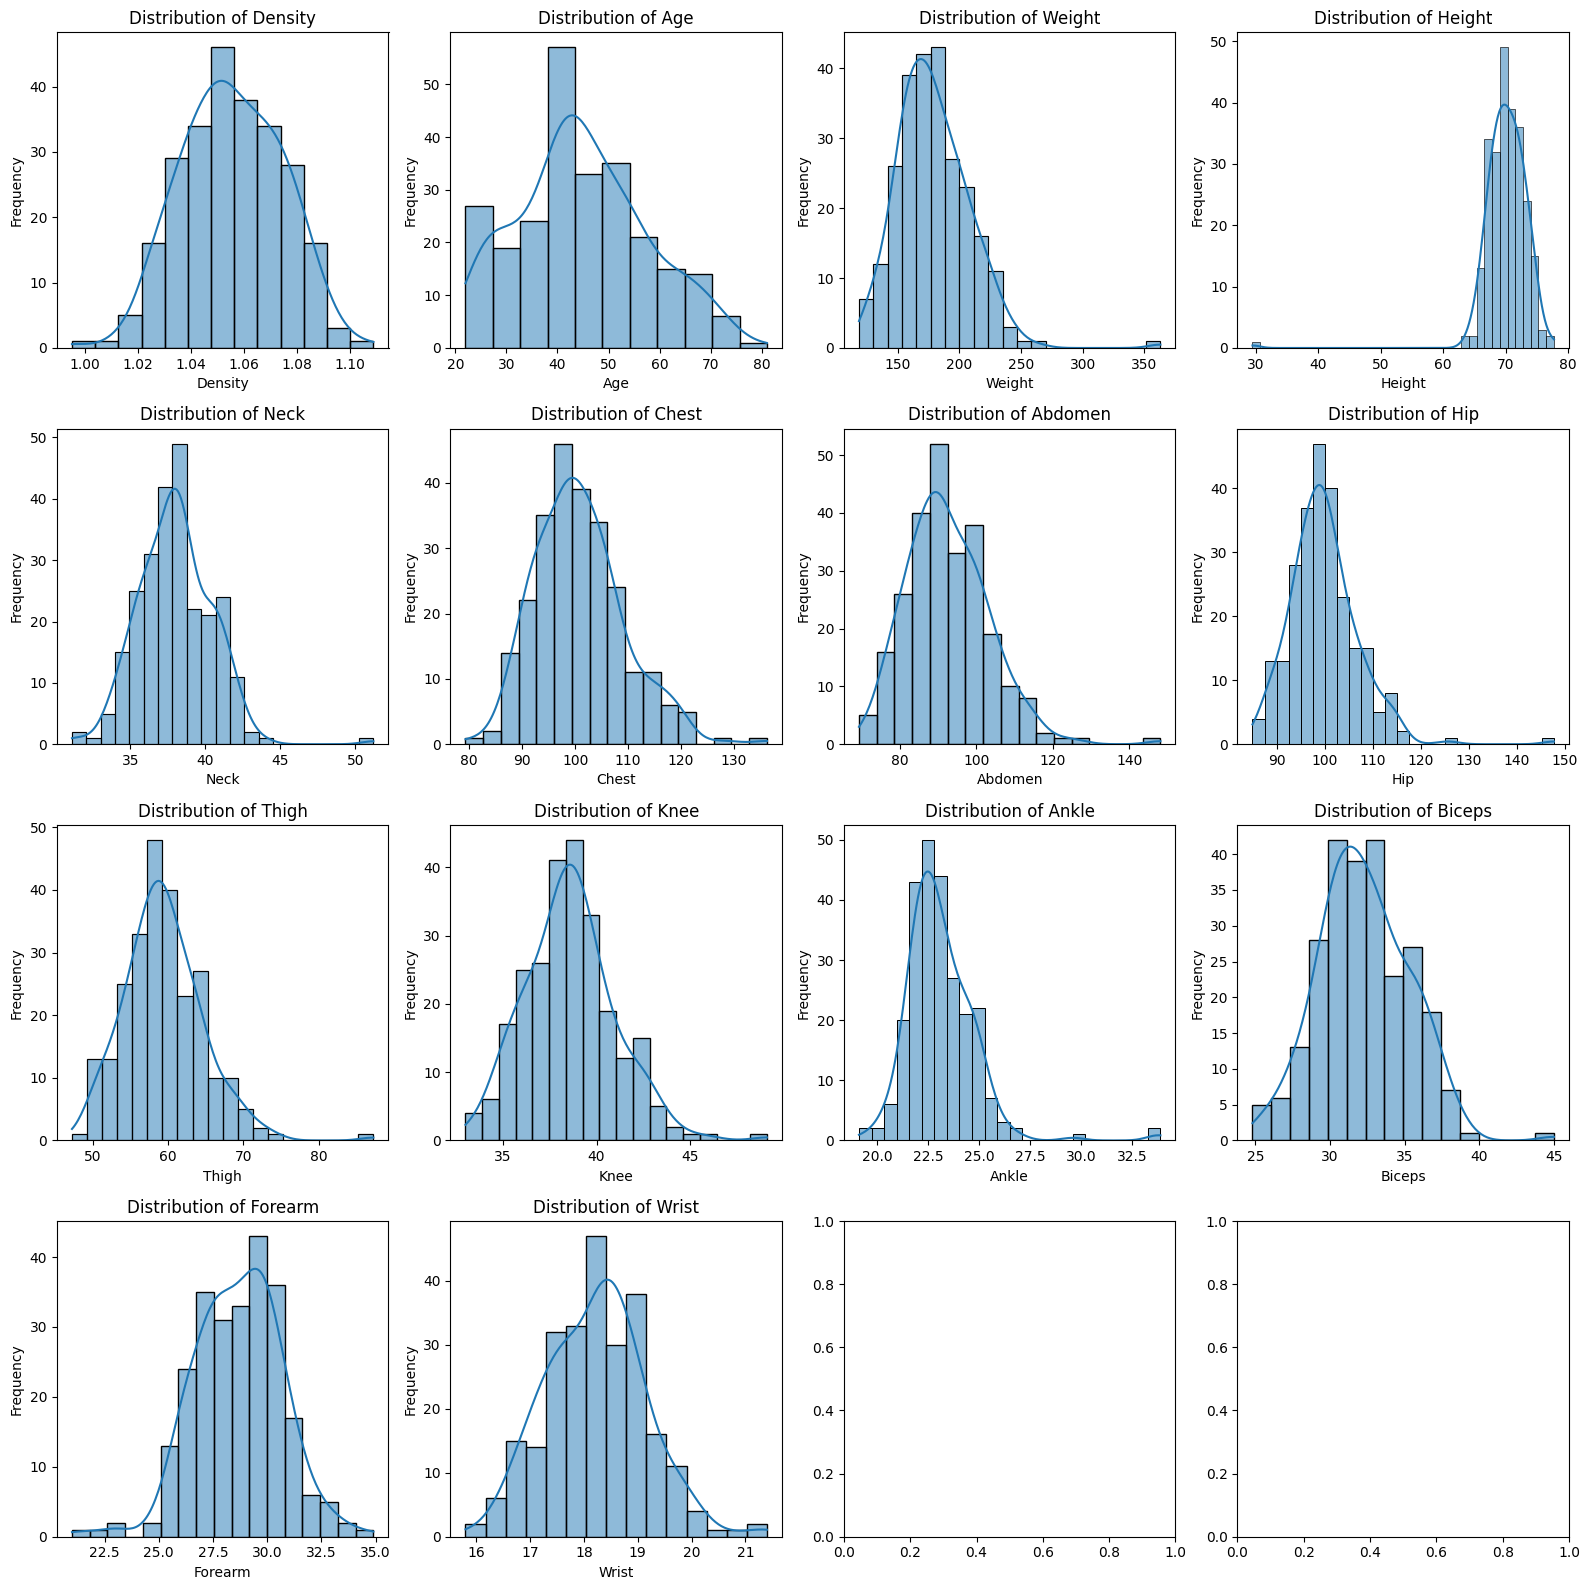

In [ ]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(4, 4, figsize=(16,16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot on each subplot
for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i]) # Specify the subplot to plot on
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

###**2.4. Outliers Detection and Handling**

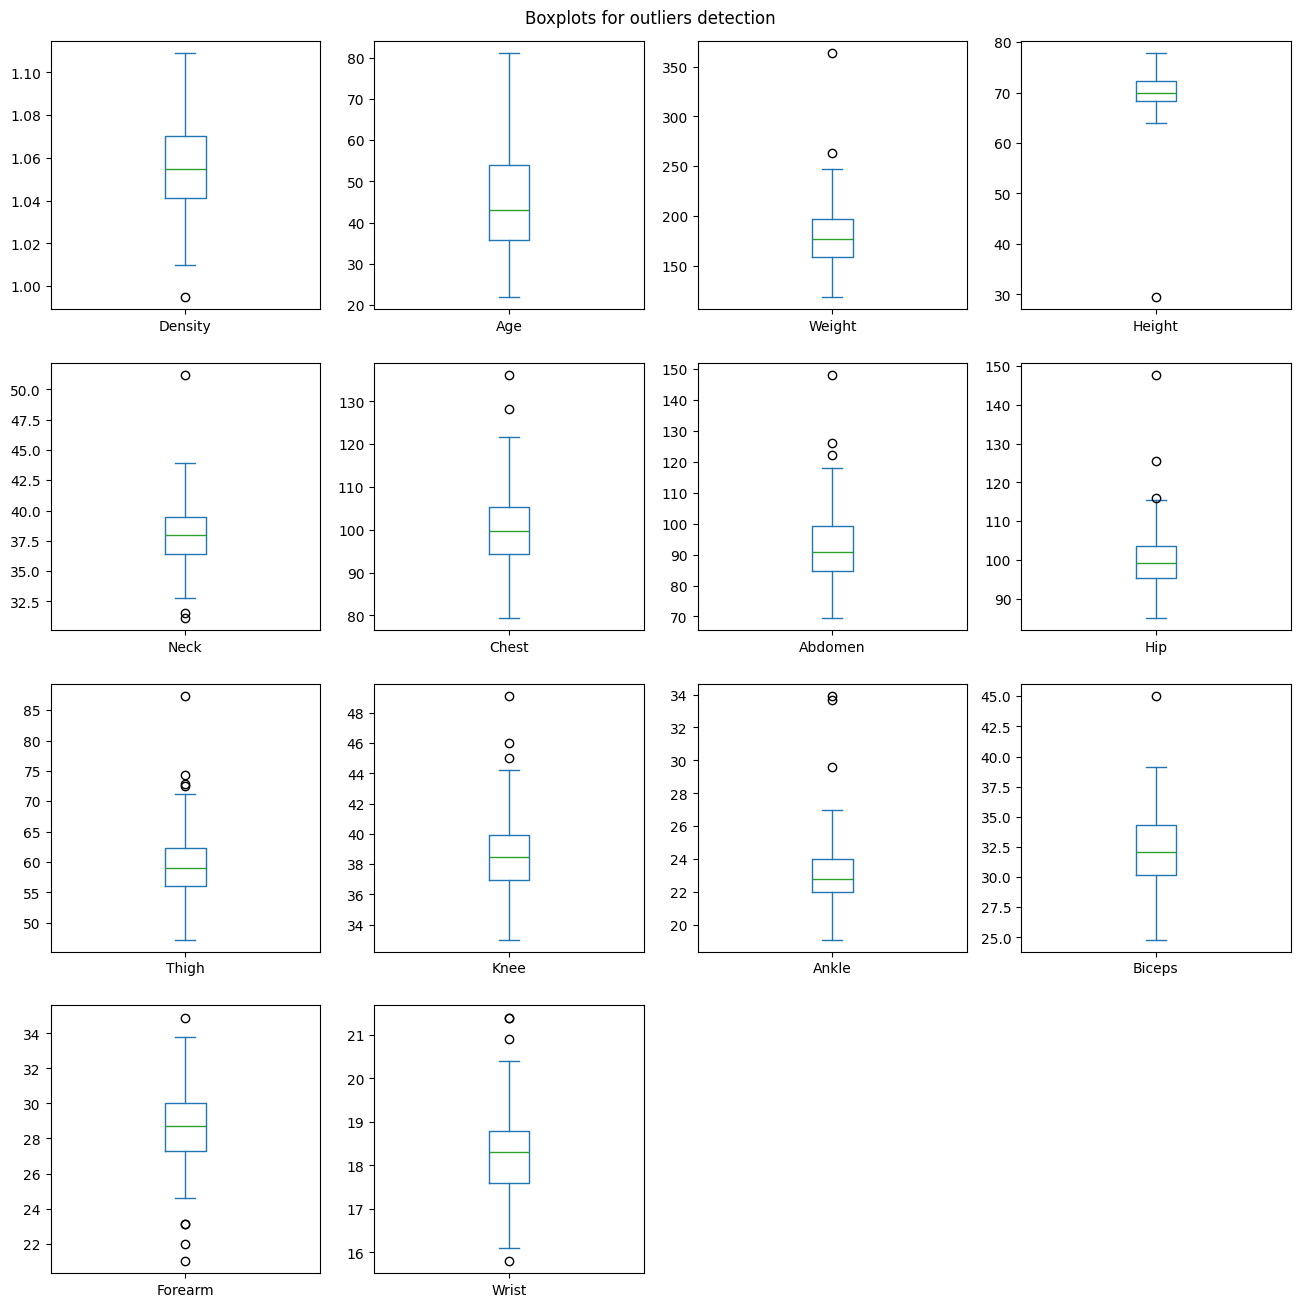

In [ ]:
#Boxplot of all the numerical columns to check the outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,16))
plt.suptitle("Boxplots for outliers detection",y=0.9)
plt.show()

---

Outliers detected in multiple columns. Needs to be cleaned.

---

In [ ]:
df_copy = df.copy()

for column in df_copy.select_dtypes(include=['float64', 'int64']).columns:
  #IQR method for handling outliers
  Q1 = df_copy[column].quantile(0.25)
  Q3 = df_copy[column].quantile(0.75)
  IQR = Q3 - Q1
  #defining lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  #replacing outliers with mean values
  df_copy.loc[df_copy[column] < lower_bound, column] = df_copy[column].mean().astype(int)
  df_copy.loc[df_copy[column] > upper_bound, column] = df_copy[column].mean().astype(int)


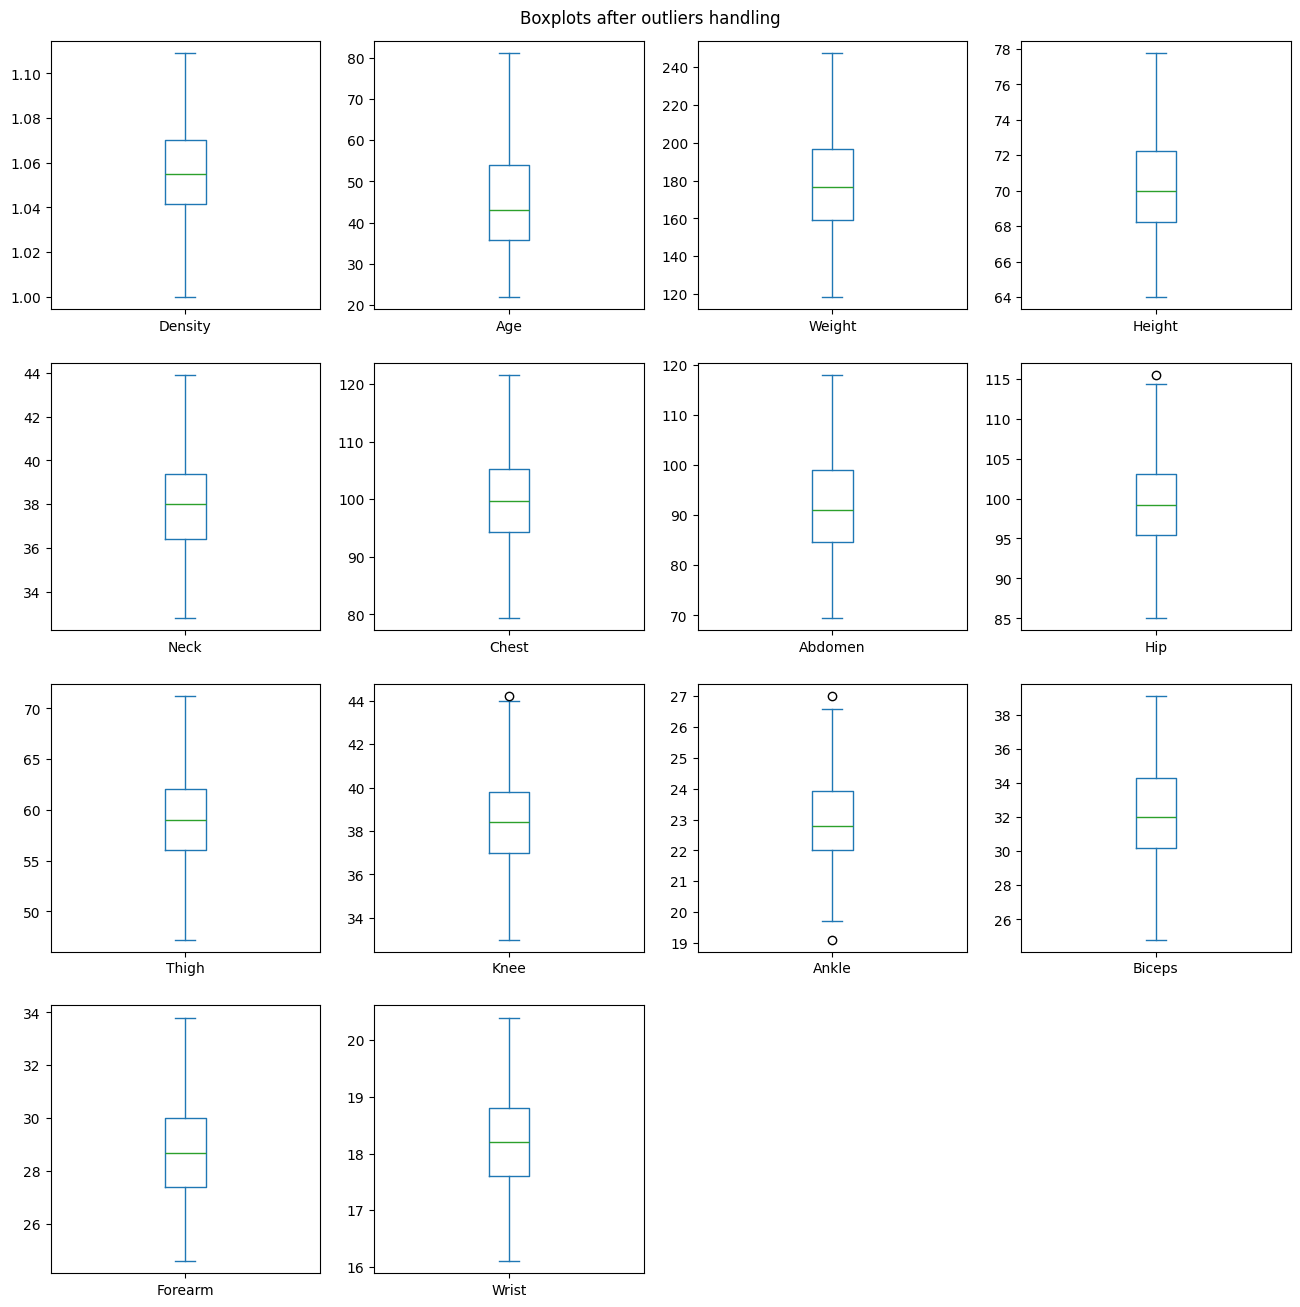

In [ ]:
#Checking after outlier detection and removal
df_copy.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,16))
plt.suptitle("Boxplots after outliers handling",y=0.9)
plt.show()

---

Very few of the outliers seen in four of the columns are very close to the normal range. So, no more alteration in outliers done.

OUTLIERS HANDLED !

---

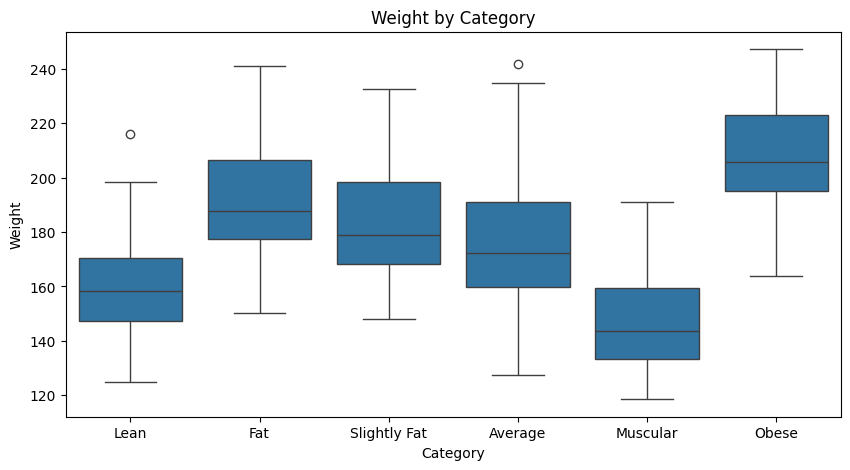

In [ ]:
#visualize the category people of different weight belong to after outlier removal
plt.figure(figsize=(10,5))
sns.boxplot(x="Category",y = "Weight",data=df_copy)
plt.title("Weight by Category")
plt.xlabel("Category")
plt.ylabel("Weight")
plt.show()

---
Observations:
1. Obese people's weight lies in between 200 to 220 lbs whereas muscular people tend to have weight in between 140 to 160 lbs.
2. We can say from mean weight that there's a 60lbs weight difference between muscular and obese people.

---

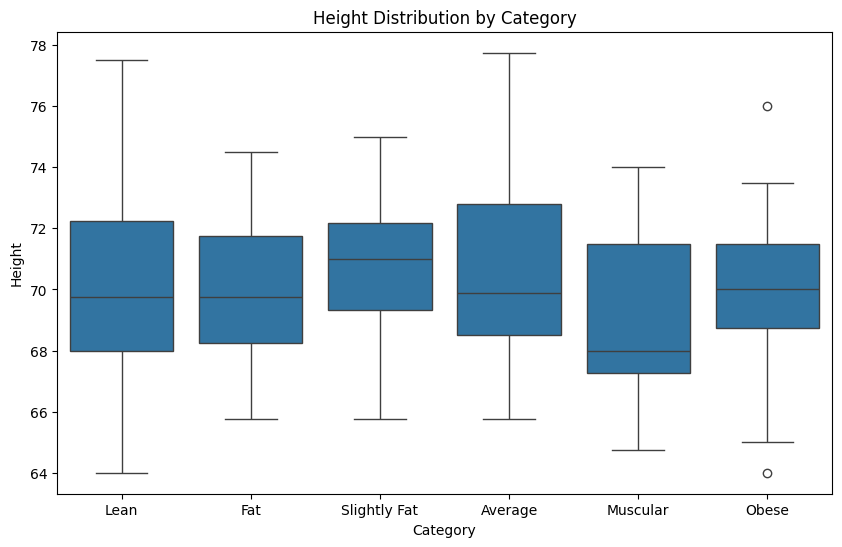

In [ ]:
#visualize what category people belong to based on their height
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Height', data=df_copy)
plt.title('Height Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Height')
plt.show()

## **3. Training, Testing and Inference**

In [ ]:
# 1. Separate features and target variable
num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
X = df_copy[num_cols]
y = df_copy['Category']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (201, 14)
Shape of X_test: (51, 14)
Shape of y_train: (201,)
Shape of y_test: (51,)


In [ ]:
X_train.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,1.0491,39,166.75,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,1.0473,54,198.00,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,1.0209,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,1.0678,51,149.25,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,1.0322,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4


In [ ]:
y_train

,Category
136,Slightly Fat
55,Slightly Fat
204,Obese
216,Lean
147,Fat
...,...
106,Average
14,Slightly Fat
92,Lean
179,Average


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
label_encoder = LabelEncoder()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

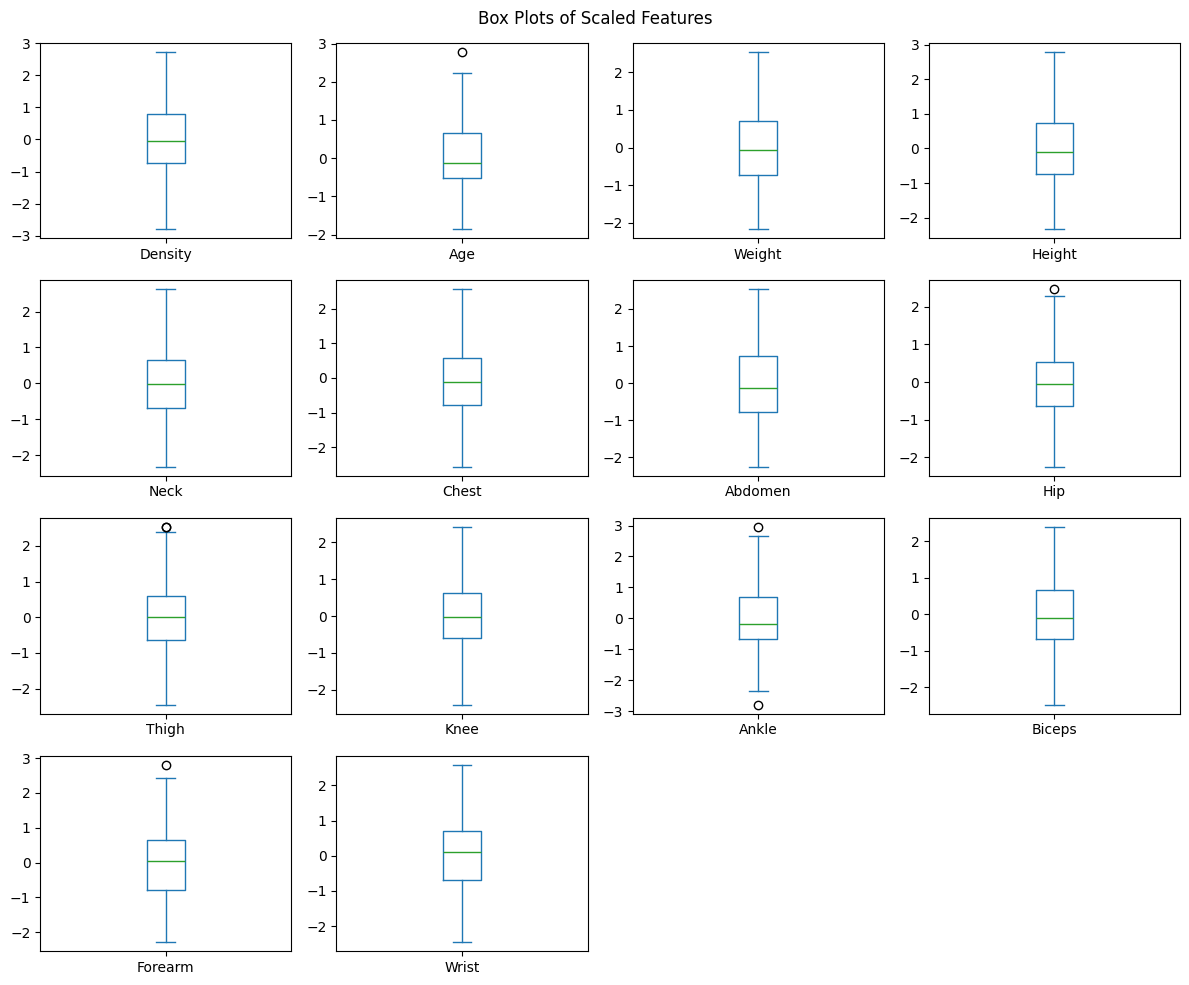

In [ ]:
df_scaled = pd.DataFrame(X_train_scaled, columns=df_copy.drop('Category', axis=1).columns)

#Box-plot after Scaling
df_scaled.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12, 10))
plt.suptitle("Box Plots of Scaled Features")
plt.tight_layout()
plt.show()

In [ ]:
#Save df_scaled as csv file
df_scaled.to_csv('df_scaled.csv', index=False)

---

### 3.1 **Model Selection and Training**

---

We'll try five different classification models:
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Machine Classifier

---

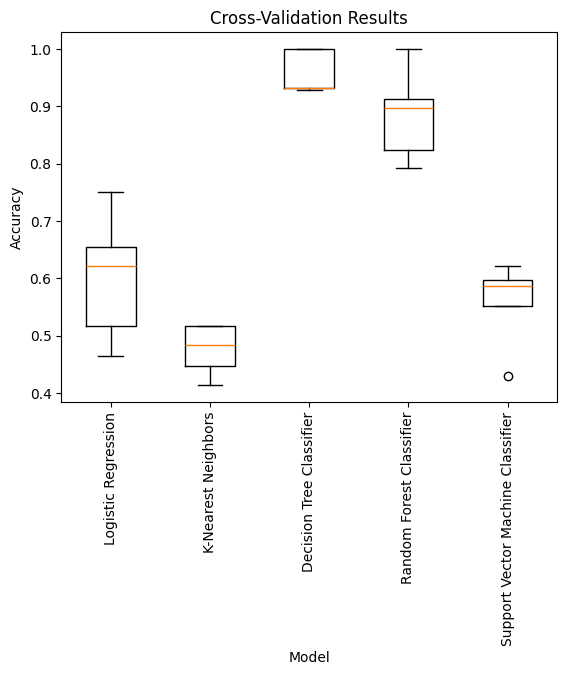

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine Classifier": SVC()
}


#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=kf, scoring='accuracy')

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

---

Comparing the accuracy of all models, we confirm that Decision Tree Classifier has the heighest accuracy on our training dataset.

---

Let's test our models using the testing dataset.

In [ ]:
test_mse = {}
for name, model in models.items():

  # Fit the model to the training data
  model.fit(X_train_scaled,y_train_encoded)

  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)

  # Calculate the test accuracy
  test_accuracy = accuracy_score(y_test_encoded, y_pred)

  # Store the test accuracy in the dictionary
  test_mse[name] = test_accuracy
  print(f"{name} test accuracy: {test_accuracy}")


Logistic Regression test accuracy: 0.6078431372549019
K-Nearest Neighbors test accuracy: 0.43137254901960786
Decision Tree Classifier test accuracy: 0.9411764705882353
Random Forest Classifier test accuracy: 0.8431372549019608
Support Vector Machine Classifier test accuracy: 0.5294117647058824


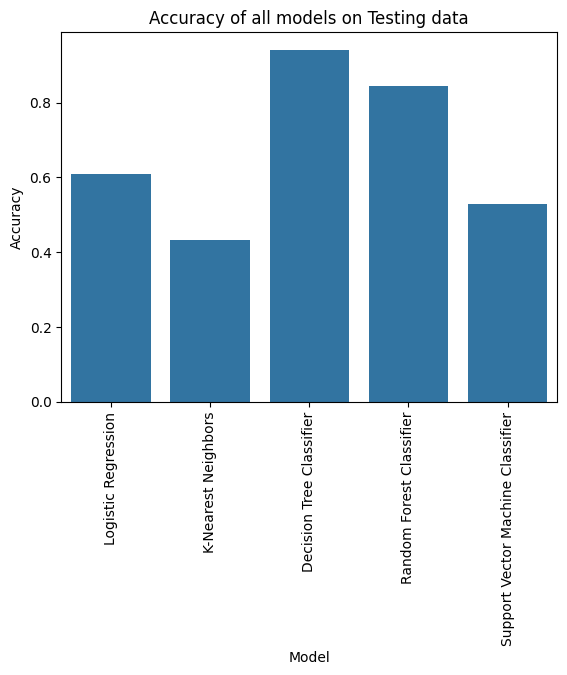

In [ ]:
#bar graph to show mse of all models

sns.barplot(x=list(models.keys()), y=test_mse.values())
plt.title("Accuracy of all models on Testing data")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

---

From above two figures, we conclude that the Decision Tree Classifier model has the highest cross validation scores and accuracy on both training and testing datasets.

---

In [ ]:
#Create the decision tree classifier model
baseline_model = DecisionTreeClassifier()

#Fit the model to the training data
baseline_model.fit(X_train_scaled, y_train_encoded)

#Make predictions on the test set
y_pred = baseline_model.predict(X_test_scaled)



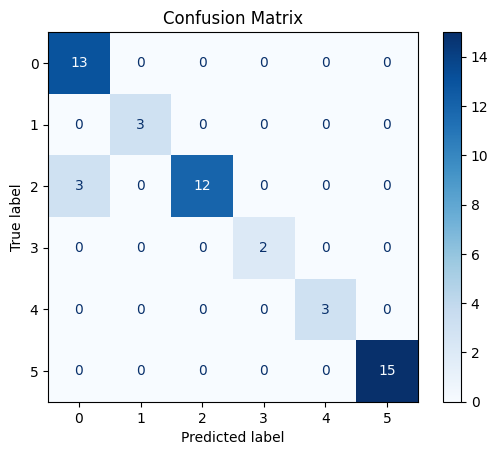

In [ ]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\n"+"="*30+"\n")
print(f"Model is {accuracy*100:.4f}% accurate.")
print("\n"+"="*30)
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.9412
Precision (weighted): 0.9522
Recall (weighted): 0.9412
F1-score (weighted): 0.9410


Model is 94.1176% accurate.

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89        15
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        15

    accuracy                           0.94        51
   macro avg       0.97      0.97      0.96        51
weighted avg       0.95      0.94      0.94        51



## **4. Tuning HyperParameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,55,5),
    'min_samples_split': np.arange(2,10,1),
    'min_samples_leaf': np.arange(1,10),
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
dtc_cv = RandomizedSearchCV(baseline_model, param_grid, cv=kf, n_jobs=-1, verbose=1, n_iter=100)

In [ ]:
dtc_cv.fit(X_train_scaled, y_train_encoded)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=1)

In [ ]:
#Printing the tuned parameters and validation score
print("Tuned paramaters: {}".format(dtc_cv.best_params_))
print("Tuned score: {}".format(dtc_cv.best_score_))

Tuned paramaters: {'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(45), 'criterion': 'entropy'}
Tuned score: 0.9751935256861365


In [ ]:
#Get the tuned model
tuned_model = dtc_cv.best_estimator_

In [ ]:
tuned_model

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(45),
                       min_samples_leaf=np.int64(4),
                       min_samples_split=np.int64(3))

In [ ]:
#Make predictions on the test set using the tuned model
y_pred_tuned = tuned_model.predict(X_test_scaled)

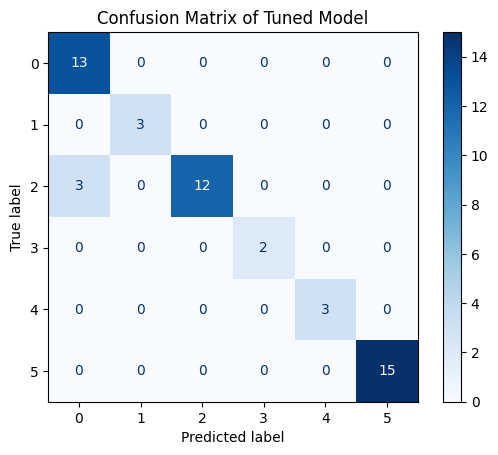

In [ ]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Tuned Model")
plt.show()


In [ ]:
# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_tuned)
precision = precision_score(y_test_encoded, y_pred_tuned, average='weighted')
recall = recall_score(y_test_encoded, y_pred_tuned, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_tuned, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\n"+"="*30+"\n")
print(f"Model is {accuracy*100:.4f}% accurate.")
print("\n"+"="*30)
print(classification_report(y_test_encoded, y_pred_tuned))

Accuracy: 0.9412
Precision (weighted): 0.9522
Recall (weighted): 0.9412
F1-score (weighted): 0.9410


Model is 94.1176% accurate.

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89        15
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        15

    accuracy                           0.94        51
   macro avg       0.97      0.97      0.96        51
weighted avg       0.95      0.94      0.94        51



---
###**SAVING THE MODEL**
---

In [ ]:
# import pickle

# with open("baseline_classification_dtcc.pkl", "wb") as f:
#     pickle.dump(baseline_model, f)

# with open("tuned_classification_dtcc.pkl", "wb") as f:
#     pickle.dump(tuned_model, f)

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(baseline_model, 'baseline_classification_dtc1.pkl')
joblib.dump(tuned_model, 'tuned_classification_dtc.pkl')

['tuned_classification_dtc.pkl']

---
**Conclusion**

---

This notebook presented a comprehensive analysis and modeling approach for predicting body fat categories based on physical measurements. The initial data exploration revealed a clean dataset with no missing or duplicate values, although outliers were present and addressed through appropriate handling techniques. Visualizations provided valuable insights into the distribution of features and the relationships between different measurements and the body fat categories.<br>

Following the data preparation steps, including splitting, scaling, and encoding, several classification models were evaluated using cross-validation and tested on a held-out set. The Decision Tree Classifier consistently demonstrated superior performance compared to other models like Logistic Regression, K-Nearest Neighbors, Random Forest Classifier, and Support Vector Machine Classifier.<br>

To further optimize the chosen model, hyperparameter tuning was performed using Randomized Search. The tuning process identified a set of parameters that resulted in a Decision Tree Classifier with improved performance on the test data, as evidenced by the evaluation metrics and confusion matrix.<br>

The tuned Decision Tree Classifier model is capable of predicting a person's body fat category with a notable level of accuracy. This model could potentially be used to provide insights into body composition based on easily obtainable physical measurements. The baseline and tuned models, along with the scaler, have been saved for future use and deployment.

---